In [9]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

## 統計計算

In [3]:
arr1 = np.array([[1,2,np.nan],[np.nan,3,4]])

In [4]:
arr1

array([[  1.,   2.,  nan],
       [ nan,   3.,   4.]])

In [29]:
dframe1 = DataFrame(arr1, index=list('AB'), columns=['One','Two','Three'])

In [7]:
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [8]:
dframe1.sum()

One      1.0
Two      5.0
Three    4.0
dtype: float64

In [9]:
dframe1.sum(axis=0)

One      1.0
Two      5.0
Three    4.0
dtype: float64

In [10]:
dframe1.sum(axis=1)

A    3.0
B    7.0
dtype: float64

In [11]:
dframe1.min()

One      1.0
Two      2.0
Three    4.0
dtype: float64

In [12]:
dframe1.idxmin()

One      A
Two      A
Three    B
dtype: object

In [13]:
dframe1.max()

One      1.0
Two      3.0
Three    4.0
dtype: float64

In [15]:
dframe1.idxmax()

One      A
Two      B
Three    B
dtype: object

#### 累積

In [16]:
dframe1.cumsum()

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,5.0,4.0


In [17]:
dframe1['B'] = 2

In [30]:
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,2.0,2.0,2.0


In [33]:
dframe2 = DataFrame([[5, np.nan, 7],[8, 9, 10]], index=list('DE'), columns=['One','Two','Three'])

In [34]:
dframe1.append(dframe2)

,One,Two,Three
A,1.0,2.0,NaN
B,2.0,2.0,2.0
D,5.0,NaN,7.0
E,8.0,9.0,10.0


NaNを足し合わせた成分はNaNと出力される

In [35]:
dframe1.append(dframe2).cumsum()

,One,Two,Three
A,1.0,2.0,NaN
B,3.0,4.0,2.0
D,8.0,NaN,9.0
E,16.0,13.0,19.0


#### いい感じに出す

In [36]:
dframe1.describe()

/Users/midori/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,One,Two,Three
count,2.000000,2.0,1.0
mean,1.500000,2.0,2.0
std,0.707107,0.0,NaN
min,1.000000,2.0,2.0
25%,1.250000,2.0,NaN
50%,1.500000,2.0,NaN
75%,1.750000,2.0,NaN
max,2.000000,2.0,2.0


(補足)
### 相関と共分散
- 散布図を元に正/負の相関関係がある
    - 正: 右肩上がりの散布図
    - 負: 右肩下がりの散布図
- 標準偏差
    - root((x -xm).../sum)
- 共分散
    - 2つの数値の平均からのズレをかけ合わせたもの
    - (x - xm)(y - ym).../sum
- 相関係数
    - ２つの数値の相関関係を表す係数
        - -1 < a < 1 → -1に近いほど負の相関, 1に近いほど正の相関
    - 共分散/(xの標準偏差* yの標準偏差)

## 株価のデータを扱った例

In [11]:
import pandas_datareader.data as pdweb
import datetime as dt

In [5]:
prices = pdweb.DataReader(['CVX','XOM','BP'], 'morningstar',start=dt.datetime(2016,1,1),end=dt.datetime(2018,1,1)).unstack(0)['Close']

In [13]:
prices.head()

Symbol,BP,CVX,XOM
Date,,,
2016-01-01,31.26,89.96,77.95
2016-01-04,31.06,88.85,77.46
2016-01-05,30.93,89.61,78.12
2016-01-06,30.30,86.07,77.47
2016-01-07,29.43,83.02,76.23


In [14]:
rets = prices.pct_change()

In [15]:
rets.head()

Symbol,BP,CVX,XOM
Date,,,
2016-01-01,NaN,NaN,NaN
2016-01-04,-0.006398,-0.012339,-0.006286
2016-01-05,-0.004185,0.008554,0.008521
2016-01-06,-0.020369,-0.039505,-0.008321
2016-01-07,-0.028713,-0.035436,-0.016006


In [3]:
%matplotlib inline

hoge


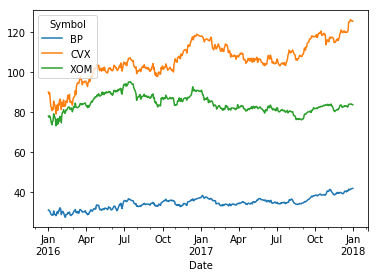

In [16]:
prices.plot()

In [17]:
rets.corr()

Symbol,BP,CVX,XOM
Symbol,,,
BP,1.000000,0.663992,0.629740
CVX,0.663992,1.000000,0.705603
XOM,0.629740,0.705603,1.000000


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

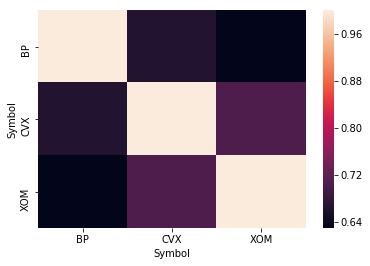

In [20]:
sns.heatmap(rets.corr())

### ユニーク

In [21]:
ser1 = Series(['w','x','w','a','z','x','y'])

In [22]:
ser1

0    w
1    x
2    w
3    a
4    z
5    x
6    y
dtype: object

In [23]:
ser1.unique()

array(['w', 'x', 'a', 'z', 'y'], dtype=object)

In [24]:
ser1.value_counts()

x    2
w    2
z    1
y    1
a    1
dtype: int64